## Identification

From repeated substitution we can conclude:

- A finite order AR(p) process can be approximated by a MA(infinity) process

- A finite order MA(q) process can be approximated by a AR(infinity) process

However, how can we distinguish the correct specification, can we establish the order of p & q of the process?

Let's consider an AR(1) process with a constant term:
$$ y_t = \alpha + \phi_1 y_{t-1} + \varepsilon_t$$

with the $ \varepsilon \sim WN$ assumption we can derive the constant unconditional mean for y_t

Through taking expectations and manipulation we find the mean of an AR(1) process is : $$\mu = \frac {\alpha}{1-\phi_1}$$

and the variance of the AR proccess is $$\gamma _0 = \frac {\sigma^2}{1 - \phi_1^2}$$

For any value of t i.e :  $ \forall t $

We find the covariance of an AR process to be: $$ \gamma _k = \phi _1 \gamma _{k-1}$$

where k is the lag being considered between two variables.

# Autocorrelation Function

The variance and autocovariances are useful in producing the autocorrelation function (ACF): $$ \rho_k = \frac {\gamma _k}{\gamma _0}$$

where gamma_0 is the variance of the time series, gamma_k is the autocovariance of the time series to order k.

note some properties of the ACF:

$$\rho _0 = 1$$
$$\rho _-k = \rho _k$$
$$-1 \leq \rho_k \leq 1$$

For understanding the autocorrelation of a series refers to the degree of correlation of the same variables between two successive time intervals.

Using the Variance and Covariance of an AR(1) / Auto regressive process we find that: $$\rho_k = \frac{\phi _1 \gamma _{k-1}}{\gamma _0} = \phi _1 \rho _{k-1}$$

which shows that when $|\phi _1| < 1$ (magnitude of the AR coefficient is less than 1 and the series is mean reverting) the autocorrelation function will **decline as k increases**. The ACF will display exponential decay towards zero. 

N.b = the autocorrelation function is independent of time.

Conversely a random walk model with $\phi = 1$ does not have a constant variance or covariance and its autocorrelation function will be time varying and not show exponential decay.

Lets illustrate this with a simple AR(1) model:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

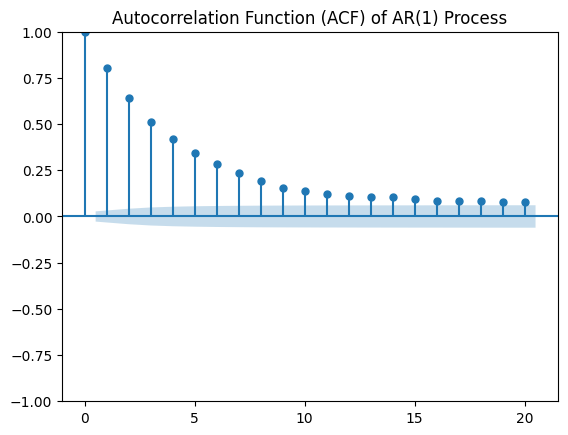

In [53]:
np.random.seed(2)

n = 5000

epsilon = np.random.normal(loc = 0, scale = 1, size = n+100)

phi_stationary = 0.8

y_stationary = np.zeros(n+100)

for t in range(1,n+100):
    y_stationary[t] = phi_stationary * y_stationary[t-1] + epsilon[t]

y_stationary = y_stationary[100:] # to get rid of zero bias for early parts of the series
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y_stationary, lags = 20, alpha = 0.05)
plt.title("Autocorrelation Function (ACF) of AR(1) Process")
plt.show()


**Mean, Variance and Covariance of Moving Average Process**

We find through taking the expectation operator of an MA(2) process, MA with two lags.

The mean of the process is: $$ \mu = 0$$

for a MA process without an intercept, we find using the Gaussian, error term's white noise assumptions:

We find the variance is: $$ \gamma _0 = (1 + \theta_1^2 + \theta_2^2)\sigma^2$$

We find the covariance of a moving average process, using the fact that the covariance between error terms is 0, to be: 
$$\gamma _1 = (\theta_1 + \theta _1\theta _2)\sigma ^2$$
$$\gamma _2 = \theta _2 \sigma^2$$
$$\gamma _3 = 0$$
$$\gamma _4 = 0$$

This means an MA(q) process only has **q** covariances not equal to zero.

All Covariances higher than q equal zero.

Since the ACF: $$ \rho _k = \frac{\gamma _k}{\gamma _0}$$

This implies for covariances of K higher than q (the order of the process), the autocorrelation is zero as the covariance is zero.

This means the autocorrelation function looks like:

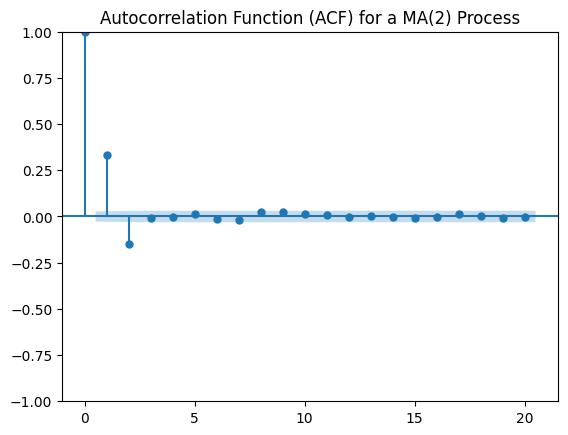

In [54]:
np.random.seed(3)

n = 5000

epsilon = np.random.normal(0,1,n+2)

#say, arbitrary
theta1 = 0.6
theta2 = -0.2

Y_MA2 = np.zeros(n)

for t in range(2,n):
    Y_MA2[t] = epsilon[t] + theta1*epsilon[t-1] + theta2*epsilon[t-2]

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(Y_MA2, lags = 20, alpha = 0.05)
plt.title("Autocorrelation Function (ACF) for a MA(2) Process")
plt.show()

Note the for loop accesses epsilon[t-2] even when t = 1, which is undefined leading to incorrect values fo the first two terms. Initializing by making sure there is a value for t-2 makes the ACF valid.

In the ACF plot, values that fall within the shaded confidence interval are not statistically significant. As random noise can cause small, non=zero ACF values at higher lags, which are within the expected variability.

We see that for covariances higher than q the autocorrelation is zero as covariance is zero.

## Summary of the Autocorrelation function for different processes:

Autoregressive - AR(p) processes have exponential decay over all values of k

Moving average - MA(q) processes have zero values for values of k greater than q

## Partial Autocorrelation functions

The Partial Autocorrelation function is another tool that aids process identification.

See ECO3017 notes for intuition.

Y_t is dependent on t-n with decreasing strength every period. We can account for this dependancy by including this value in an AR(1) model and setting it equal to zero.

The PACF accounts to estimate these parameters having removed the dependence of intervening observations.

**Key**:

For an AR(p) processs the PACF will be zero for k greater than p

For an MA(q) process the PACF will show exponential decay over all values of K

The PACF is the opposite to the ACF, this helps further with identification of the type of time series data generation process.

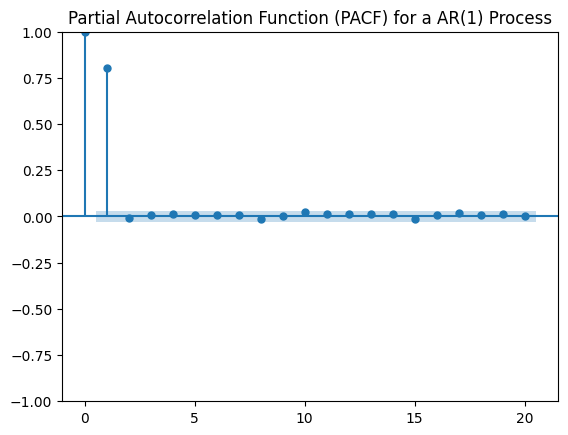

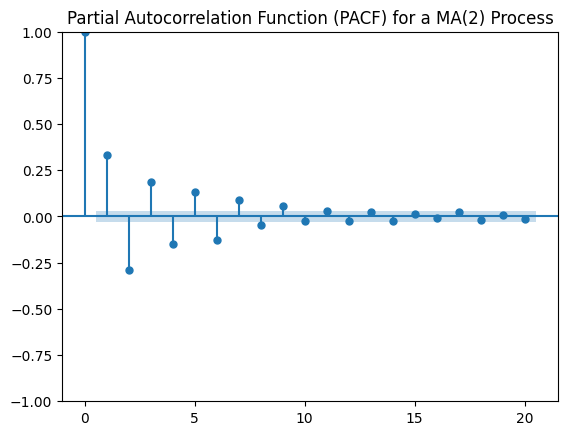

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(y_stationary, lags = 20, alpha = 0.05, title = "Partial Autocorrelation Function (PACF) for a AR(1) Process")
plt.show()

plot_pacf(Y_MA2, lags = 20, alpha = 0.05, title = "Partial Autocorrelation Function (PACF) for a MA(2) Process")
plt.show()